# Seattle Bike Sharing EDA

**Pronto Cycle Share was a public bicycle sharing system in Seattle, Washington, that operated from 2014 to 2017. The system, owned initially by a non-profit and later by the Seattle Department of Transportation, included 54 stations in the city's central neighborhoods and 500 bicycles.**


**Dictionary**

**trip_id:** numeric ID of bike trip taken

**starttime:** day and time trip started, in PST

**stoptime:** day and time trip ended, in PST

**tripduration:** time of trip in seconds

**from_station_name:** name of station where trip originated

**to_station_name:** name of station where trip terminated

**from_station_id:** ID of station where trip originated

**to_station_id:** ID of station where trip terminated

**usertype:** 
"Short-Term Pass Holder"= 24-Hour or 3-Day Pass; "Member"= Monthly or an Annual Membership

**gender:** gender of rider

**birthyear:** birth year of rider

**minutes:** trip duration in minutes

**day:** 0 = monday, 1 = tuesday, ...

**from_lat, from_long:** departure station latitude and longitude

**to_lat, to_long:** arrival station latitude and longitude





**Import Libraries and Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
#load dataset, convert some columns to datetime
finale = pd.read_csv('finale1.csv', error_bad_lines=False, parse_dates=['date', 'starttime','stoptime' ], infer_datetime_format=True)
pd.set_option('display.max_columns', 50) 

**Add new Features**

In [3]:
#add new features
finale['year'] = pd.DatetimeIndex(finale['date']).year
finale['month'] = pd.DatetimeIndex(finale['date']).month # add month as column
finale['hour'] = pd.DatetimeIndex(finale['starttime']).hour # add hour
finale['weekday'] = (finale['day'] < 5).astype(float) # add weekday or not

In [4]:
finale.head() # is holiday, night

trip_id           starttime            stoptime  tripduration  \
0      431 2014-10-13 10:31:00 2014-10-13 10:48:00       985.935   
1      432 2014-10-13 10:32:00 2014-10-13 10:48:00       926.375   
2      433 2014-10-13 10:33:00 2014-10-13 10:48:00       883.831   
3      434 2014-10-13 10:34:00 2014-10-13 10:48:00       865.937   
4      435 2014-10-13 10:34:00 2014-10-13 10:49:00       923.923   

     from_station_name                                    to_station_name  \
0  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
1  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
2  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
3  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
4  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   

  from_station_id to_station_id usertype  gender  birthyear    minutes  \
0          CBD-06         PS-04   Member    Male     1960.0  16.432250   
1          CBD-06         PS-04   Member    Male     1970.0  15.439583   
2          CBD-06         PS-04   Member  Female     1988.0  14.730517   
3          CBD-06         PS-04   Member  Female     1977.0  14.432283   
4          CBD-06         PS-04   Member    Male     1971.0  15.398717   

        date  hour  day  from_lat   from_long  from_dockcount     to_lat  \
0 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
1 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
2 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
3 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
4 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   

      to_long  to_dockcount  max_temperature_f  mean_temperature_f  \
0 -122.332946            18                 71                62.0   
1 -122.332946            18                 71                62.0   
2 -122.332946            18                 71                62.0   
3 -122.332946            18                 71                62.0   
4 -122.332946            18                 71                62.0   

   min_temperaturef  max_dew_point_f  meandew_point_f  min_dewpoint_f  \
0                54               55               51              46   
1                54               55               51              46   
2                54               55               51              46   
3                54               55               51              46   
4                54               55               51              46   

   max_humidity  mean_humidity  min_humidity  max_sea_level_pressure_in  \
0            87             68            46                      30.03   
1            87             68            46                      30.03   
2            87             68            46                      30.03   
3            87             68            46                      30.03   
4            87             68            46                      30.03   

   mean_sea_level_pressure_in  min_sea_level_pressure_in  \
0                       29.79                      29.65   
1                       29.79                      29.65   
2                       29.79                      29.65   
3                       29.79                      29.65   
4                       29.79                      29.65   

   max_visibility_miles  mean_visibility_miles  min_visibility_miles  \
0                    10                     10                     4   
1                    10                     10                     4   
2                    10                     10                     4   
3                    10                     10                     4   
4                    10                     10                     4   

   max_wind_speed_mph  mean_wind_speed_mph  precipitation_in events  year  \
0                  13                    4     

**Basic EDA**

In [36]:
finale.shape 

(236044, 43)

In [37]:
finale.starttime.describe() # overall 236.044 trips from 10/2014 to 08/2016

count                  236044
unique                 176205
top       2016-07-10 12:37:00
freq                       11
first     2014-10-13 10:31:00
last      2016-08-31 23:49:00
Name: starttime, dtype: object

In [38]:
finale.trip_id.describe()

count    236044.000000
mean     130059.769755
std       72842.492800
min         431.000000
25%       67743.750000
50%      130529.500000
75%      192899.250000
max      255245.000000
Name: trip_id, dtype: float64

**Missing Values**

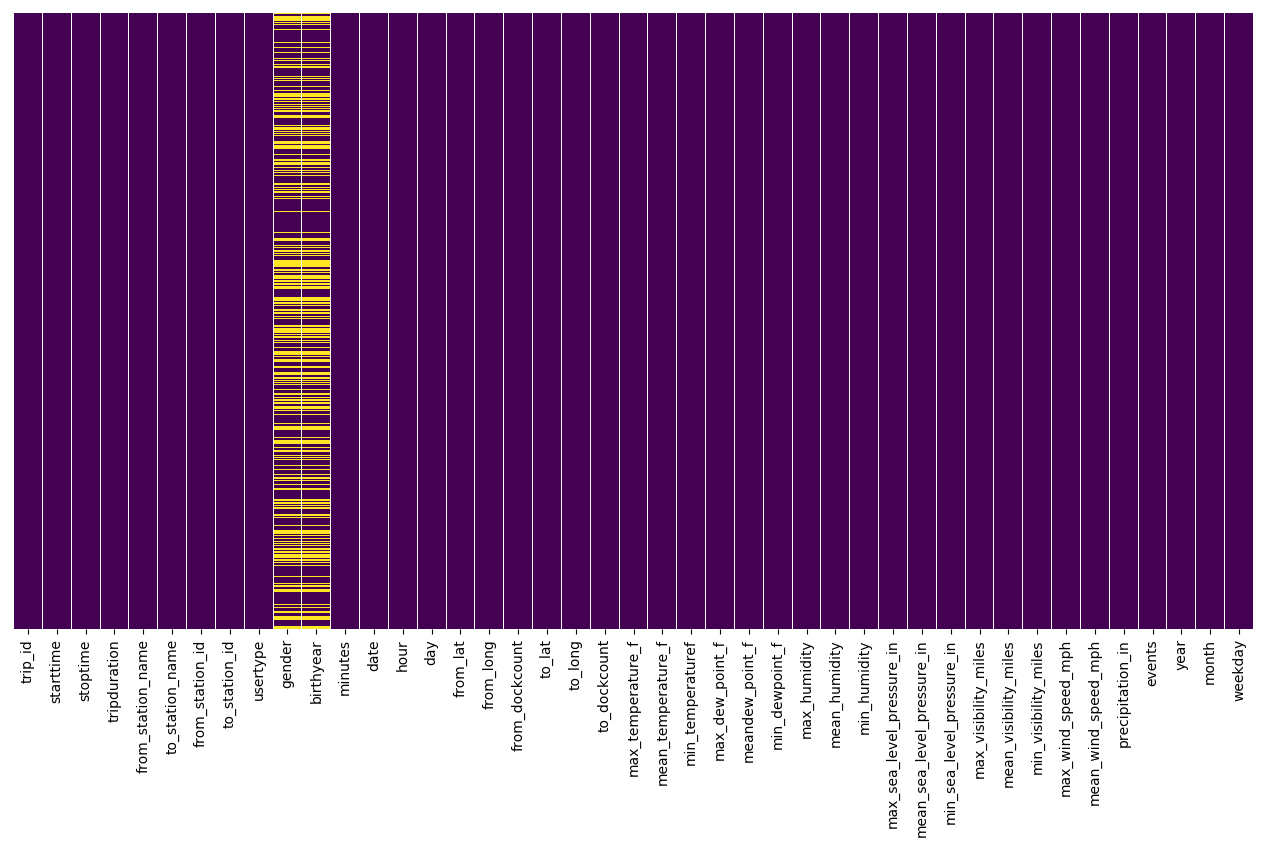

In [46]:
# only gender and birthyear have missing values and are left in the df because 
# this data is only known for members 
plt.style.use('default')
plt.figure(figsize=(16, 8))
sb.heatmap(finale.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

# EDA

In [53]:
# in general how much trips have members vs. short-term made at each hour a day
cnt = finale.groupby('hour').count()
cnt.head()

trip_id  starttime  stoptime  tripduration  from_station_name  \
hour                                                                  
0        1540       1540      1540          1540               1540   
1         985        985       985           985                985   
2         721        721       721           721                721   
3         398        398       398           398                398   
4         619        619       619           619                619   

      to_station_name  from_station_id  to_station_id  usertype  gender  \
hour                                                                      
0                1540             1540           1540      1540     856   
1                 985              985            985       985     474   
2                 721              721            721       721     281   
3                 398              398            398       398     241   
4                 619              619            619       619     495   

      birthyear  minutes  date   day  from_lat  from_long  from_dockcount  \
hour                                                                        
0           856     1540  1540  1540      1540       1540            1540   
1           474      985   985   985       985        985             985   
2           281      721   721   721       721        721             721   
3           241      398   398   398       398        398             398   
4           495      619   619   619       619        619             619   

      to_lat  to_long  to_dockcount  max_temperature_f  mean_temperature_f  \
hour                                                                         
0       1540     1540          1540               1540                1540   
1        985      985           985                985                 985   
2        721      721           721                721                 721   
3        398      398           398                398                 398   
4        619      619           619                619                 619   

      min_temperaturef  max_dew_point_f  meandew_point_f  min_dewpoint_f  \
hour                                                                       
0                 1540             1540             1540            1540   
1                  985              985              985             985   
2                  721              721              721             721   
3                  398              398              398             398   
4                  619              619              619             619   

      max_humidity  mean_humidity  min_humidity  max_sea_level_pressure_in  \
hour                                                                         
0             1540           1540          1540                       1540   
1              985            985           985                        985   
2              721            721           721                        721   
3              398            398           398                        398   
4              619            619           619                        619   

      mean_sea_level_pressure_in  min_sea_level_pressure_in  \
hour                                                          
0                           1540                       1540   
1                            985                        985   
2                            721                        721   
3                            398                        398   
4                            619                        619   

      max_visibility_miles  mean_visibility_miles  min_visibility_miles  \
hour                                                                      
0                     1540                   1540                  1540   
1                      985                    985                   985   
2                      721                    721                   721  

In [69]:
df = finale['trip_id']

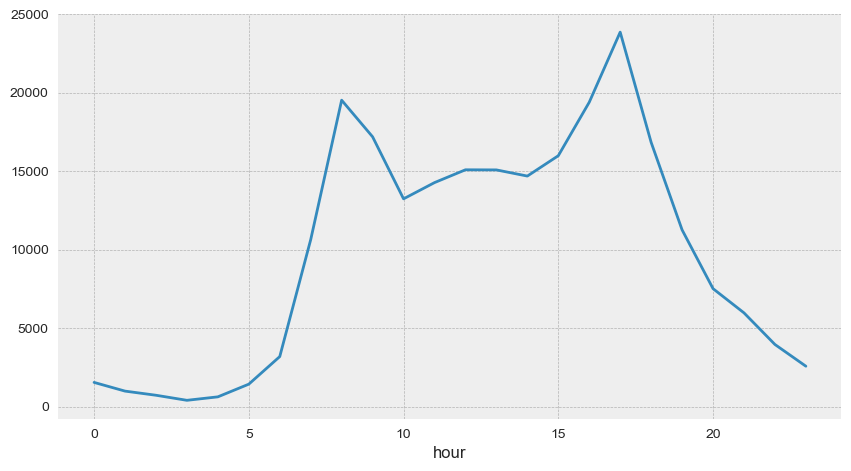

In [75]:
# plot of all aggregated trips at each hour the day
# one could see the pikes of the commuters at 8 and 17 o´clock
plt.style.use('bmh')
plt.figure(figsize = (9,5))
cnt['trip_id'].plot(grid=True)

In [11]:
# Count trips by date
by_date = finale.pivot_table('trip_id', aggfunc='count',
                            index='date',
                            columns='usertype')

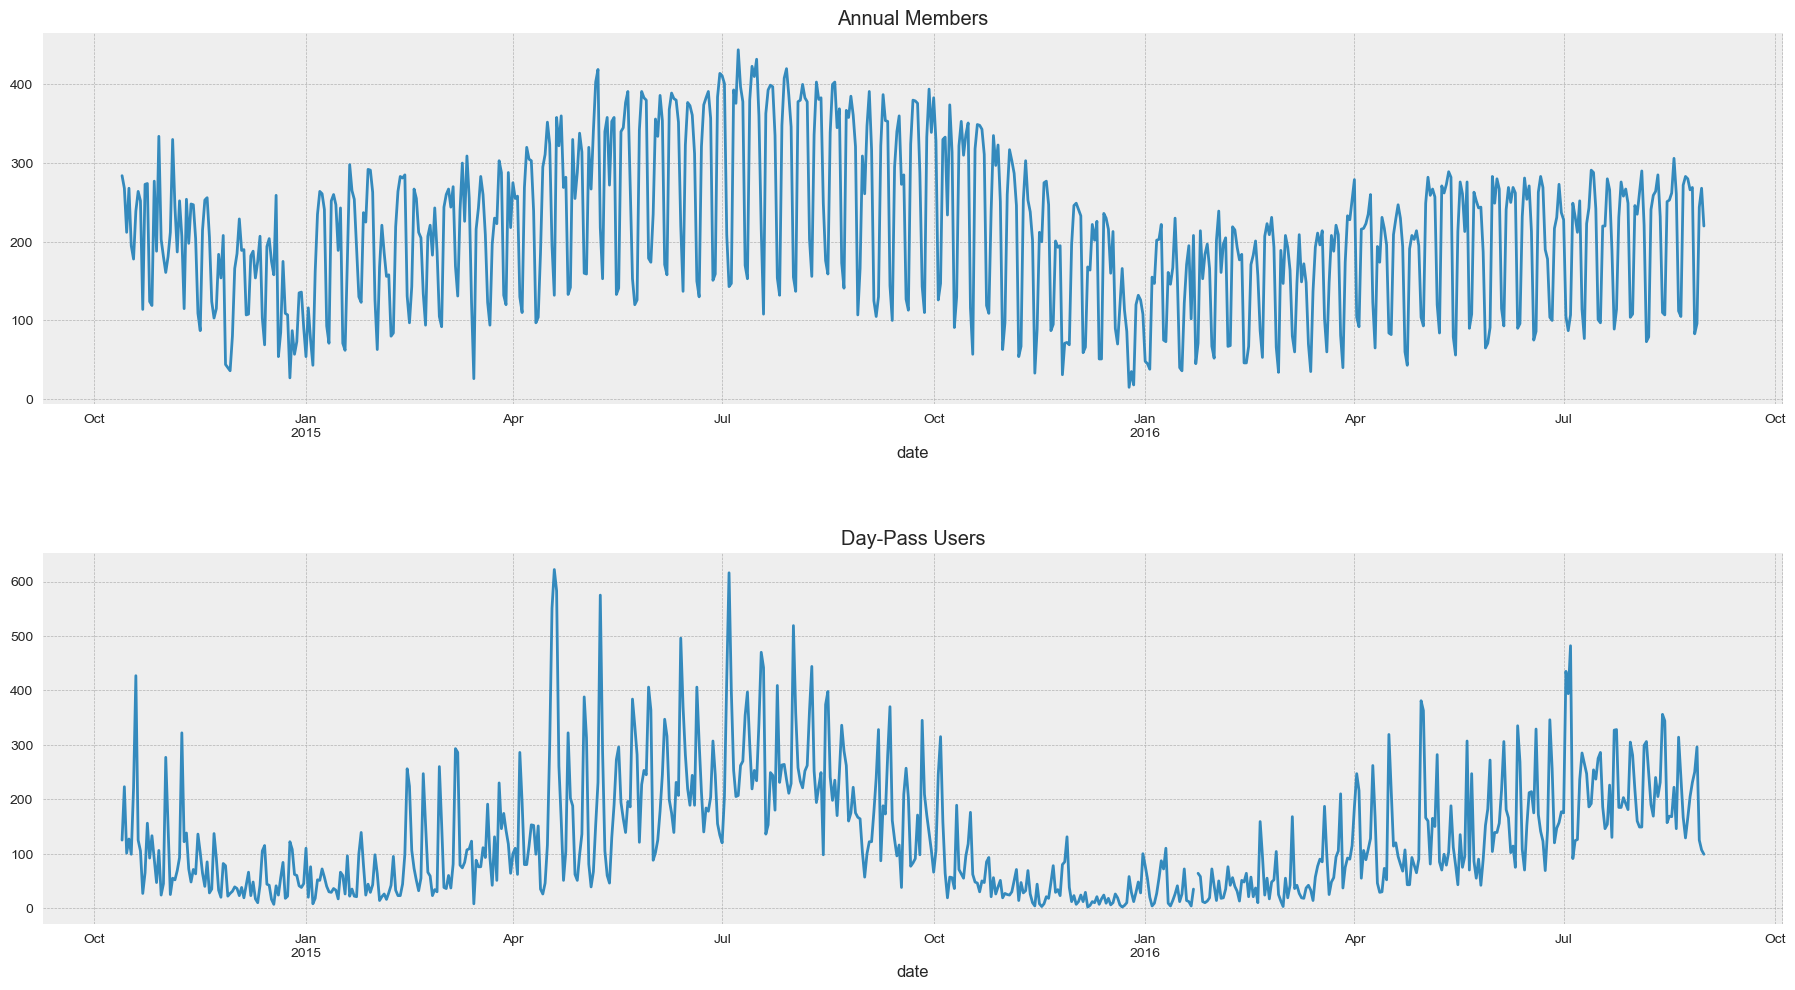

In [67]:
# there is a usage decline for commuters in 2016 vs. 2015
# the numbers are getting lower especially in the summer
# for short-term user there are some big pikes between april and july 2015, why? holidays?

plt.style.use('bmh')
fig, ax = plt.subplots(2, figsize=(20, 11))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Annual Members');
by_date.iloc[:, 1].plot(ax=ax[1], title='Day-Pass Users');
plt.savefig('years.png')

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


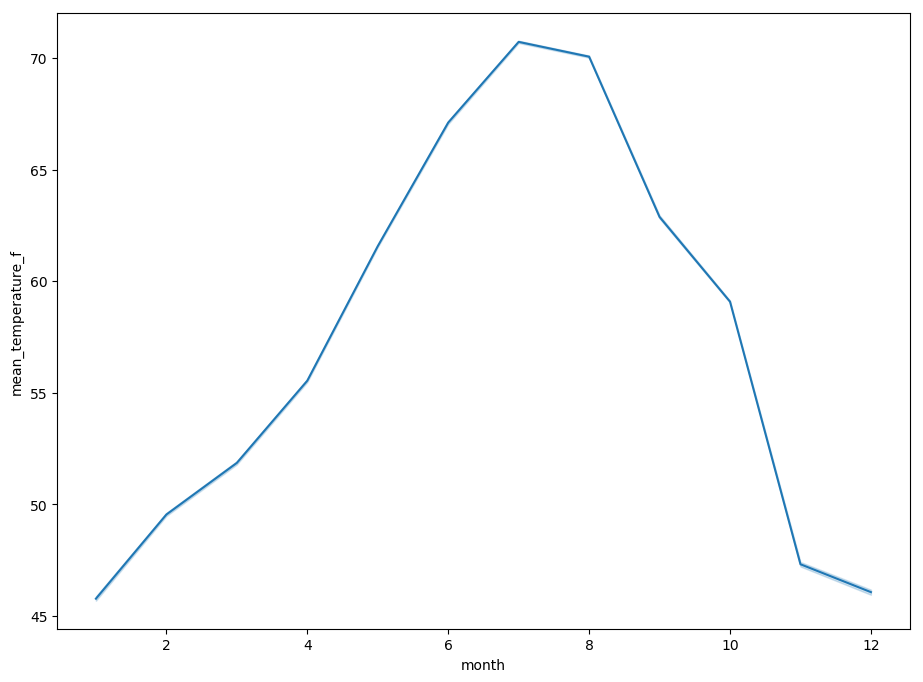

In [13]:
plt.figure(figsize = (11,8))
sb.lineplot(y=finale['mean_temperature_f'], x=finale['month'])

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


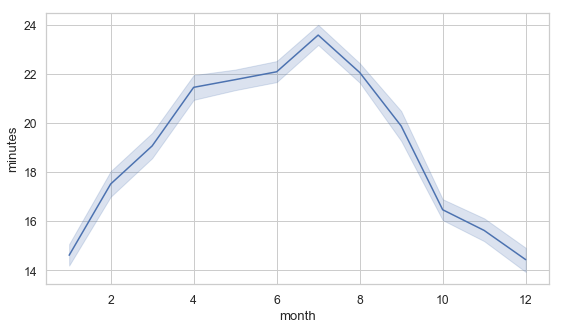

In [32]:
# in general the longest rides are taken in july
plt.figure(figsize = (9,5))
sb.lineplot(x=finale['month'], y=finale['minutes']);

In [94]:
df = finale.groupby(['date']).count()

In [93]:
df.reset_index(level=0, inplace=True)

In [92]:
col_list = ['date', 'trip_id']
df = df[col_list]

# Usertype related EDA

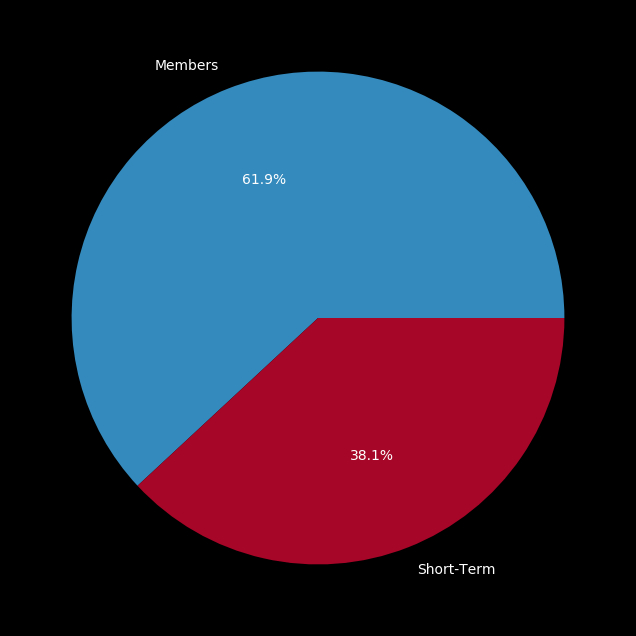

In [17]:
#pie plot members vs. short-term
sb.set_palette('deep')
plt.style.use('bmh')
plt.figure(figsize=(10,8))
plt.pie(finale.usertype.value_counts().div(len('trip_id')).mul(100), labels=['Members', 'Short-Term'], autopct='%1.1f%%')
plt.show()

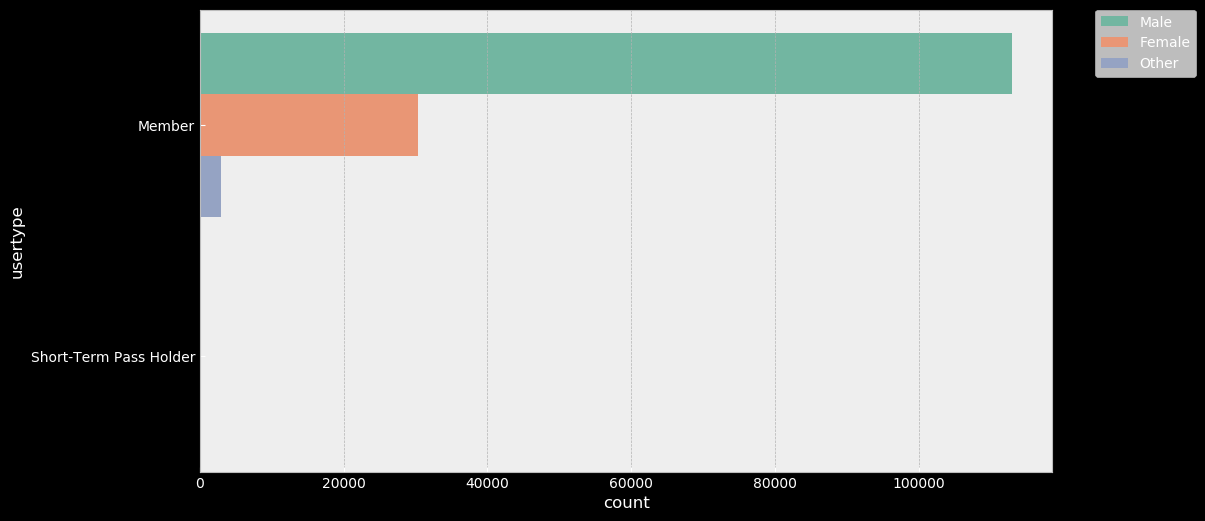

In [33]:
#gender and birthyear data is only known for members
# there are 4 times as much male riders vs. ladies
plt.figure(figsize = (11,6))
sb.countplot(y=finale['usertype'], hue=finale['gender'], palette = 'Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


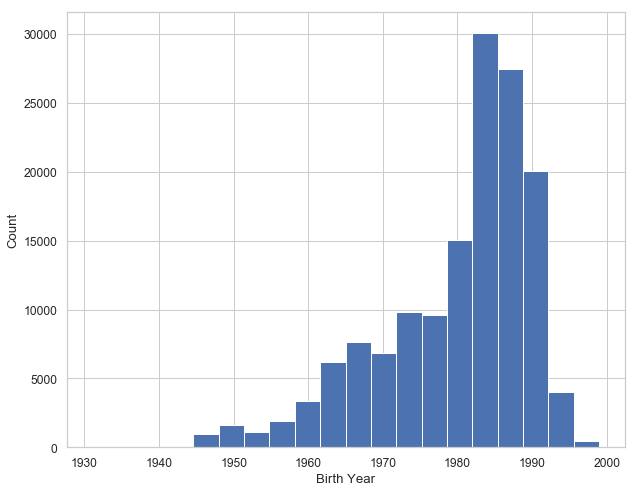

In [25]:
# and these riders are mostly born around 1985 (34 years)
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})
sb.distplot(
    finale['birthyear'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Birth Year', ylabel='Count');

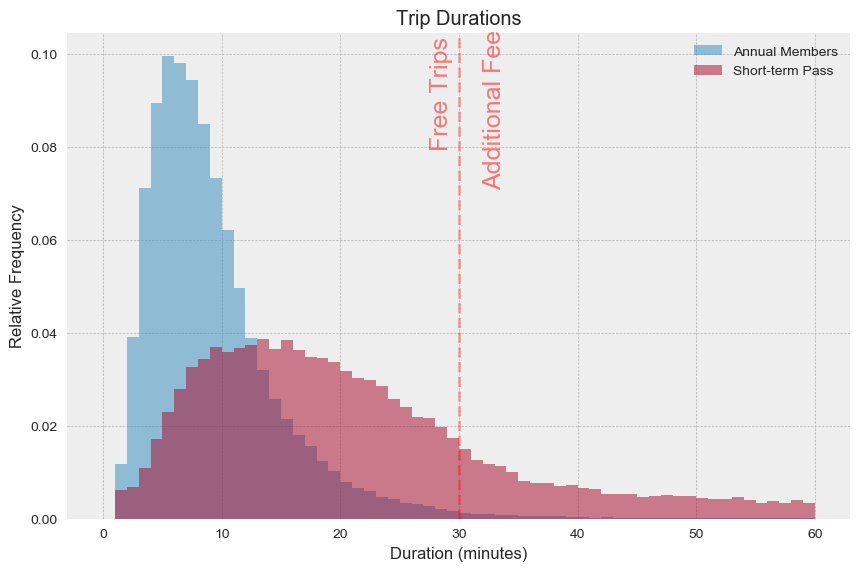

In [79]:
# members use to take a free ride not longer than 10 min. 
# short-termi riders like to take more time and even pay
plt.figure(figsize = (9,6))
plt.style.use('bmh')
finale['minutes'] = finale.tripduration / 60
finale.groupby('usertype')['minutes'].hist(bins=np.arange(61), alpha=0.5, density=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('Relative Frequency')
plt.title('Trip Durations')
plt.text(34, 0.09, "Free Trips \n\nAdditional Fee", ha='right',
         size=18, rotation=90, alpha=0.5, color='red')
plt.legend(['Annual Members', 'Short-term Pass'])

plt.axvline(30, linestyle='--', color='red', alpha=0.3);

Text(0.5, 1.0, 'Trips')

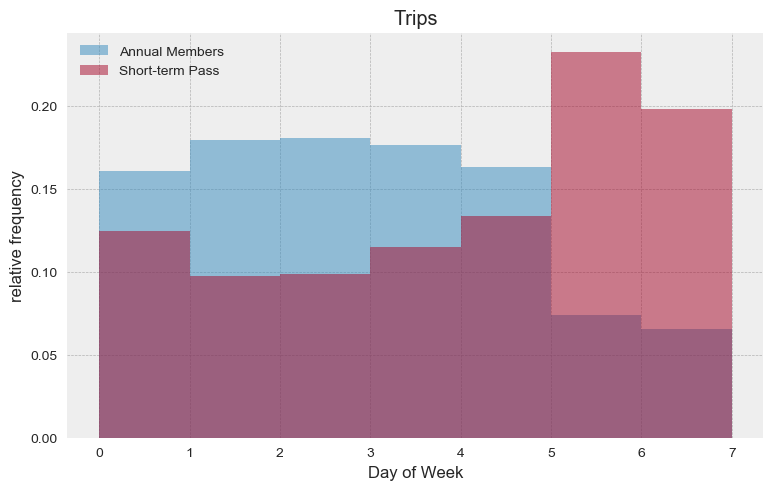

In [80]:
# members ride more througout the week, not weekends = commuter
# short term rider do it more on the weekend = tourists
plt.figure(figsize = (8,5))
plt.style.use('bmh')
finale.groupby('usertype')['day'].hist(bins=np.arange(8), alpha=0.5, density=True);
#finale.groupby('usertype')['day'].plot();
plt.legend(['Annual Members', 'Short-term Pass'])
plt.xlabel('Day of Week')
plt.ylabel('relative frequency')
plt.title('Trips')

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


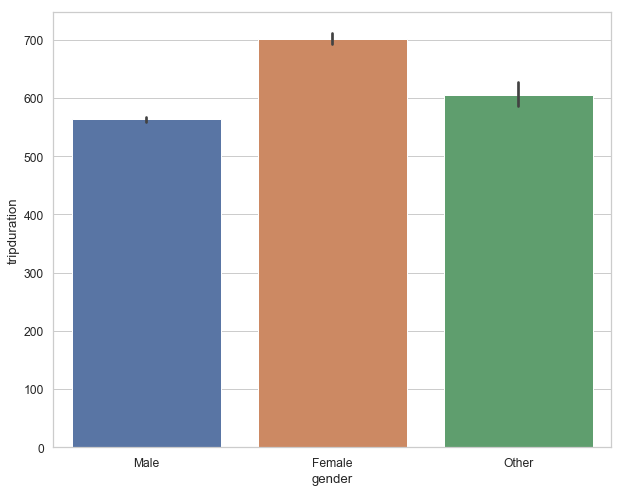

In [27]:
# despite using shared bikes less, female members and others have longer trip durations
ax = sb.barplot(x="gender", y="tripduration", data=finale)

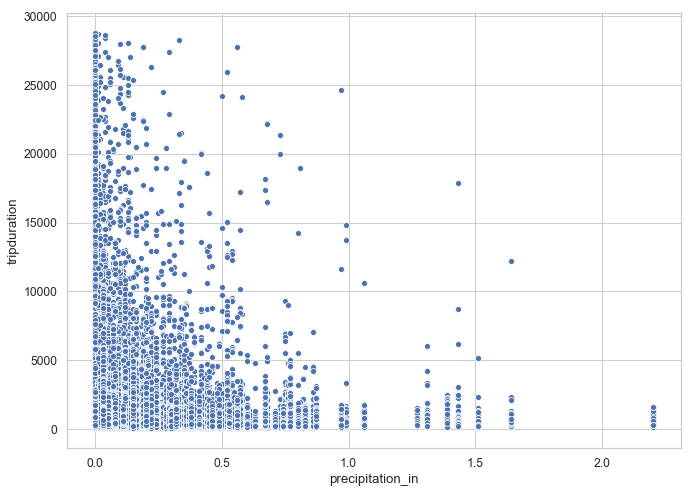

In [30]:
# when its raining no one takes a bike
plt.figure(figsize = (11,8))
sb.scatterplot(x=finale['precipitation_in'], y=finale['tripduration']);

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


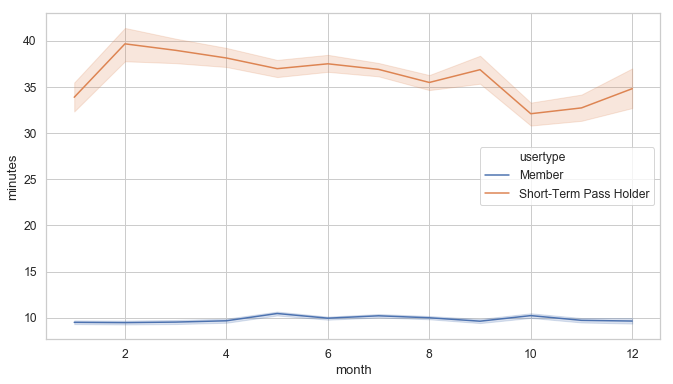

In [71]:
# members have a steady max of 10 min. througout the year
# and short-term around 35 min.
plt.figure(figsize = (11,6))
ax = sb.lineplot(x="month", y='minutes', hue="usertype", data=finale)

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


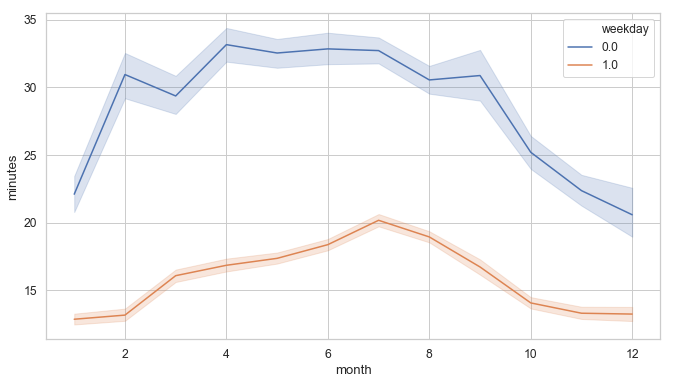

In [36]:
plt.figure(figsize = (11,6))
ax = sb.lineplot(x="month", y='minutes', hue="weekday", data=finale)

/Applications/anaconda3/envs/nf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


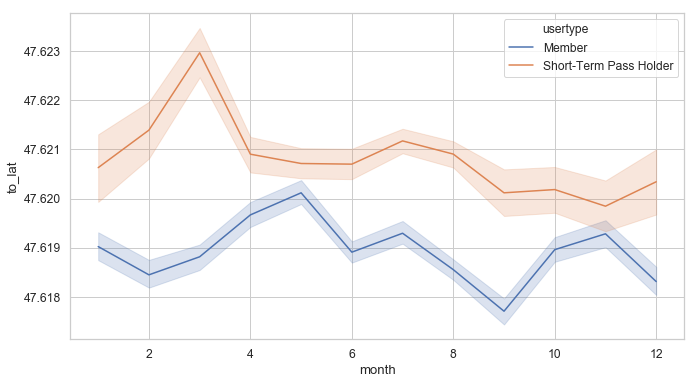

In [34]:
# members and short-term drive in totally different locations
plt.figure(figsize = (11,6))
ax = sb.lineplot(x="month", y='to_lat', hue="usertype", data=finale)

In [83]:
# Count trips by date
by_date = finale.pivot_table('trip_id', aggfunc='count',
                              index='day',
                              columns='usertype')

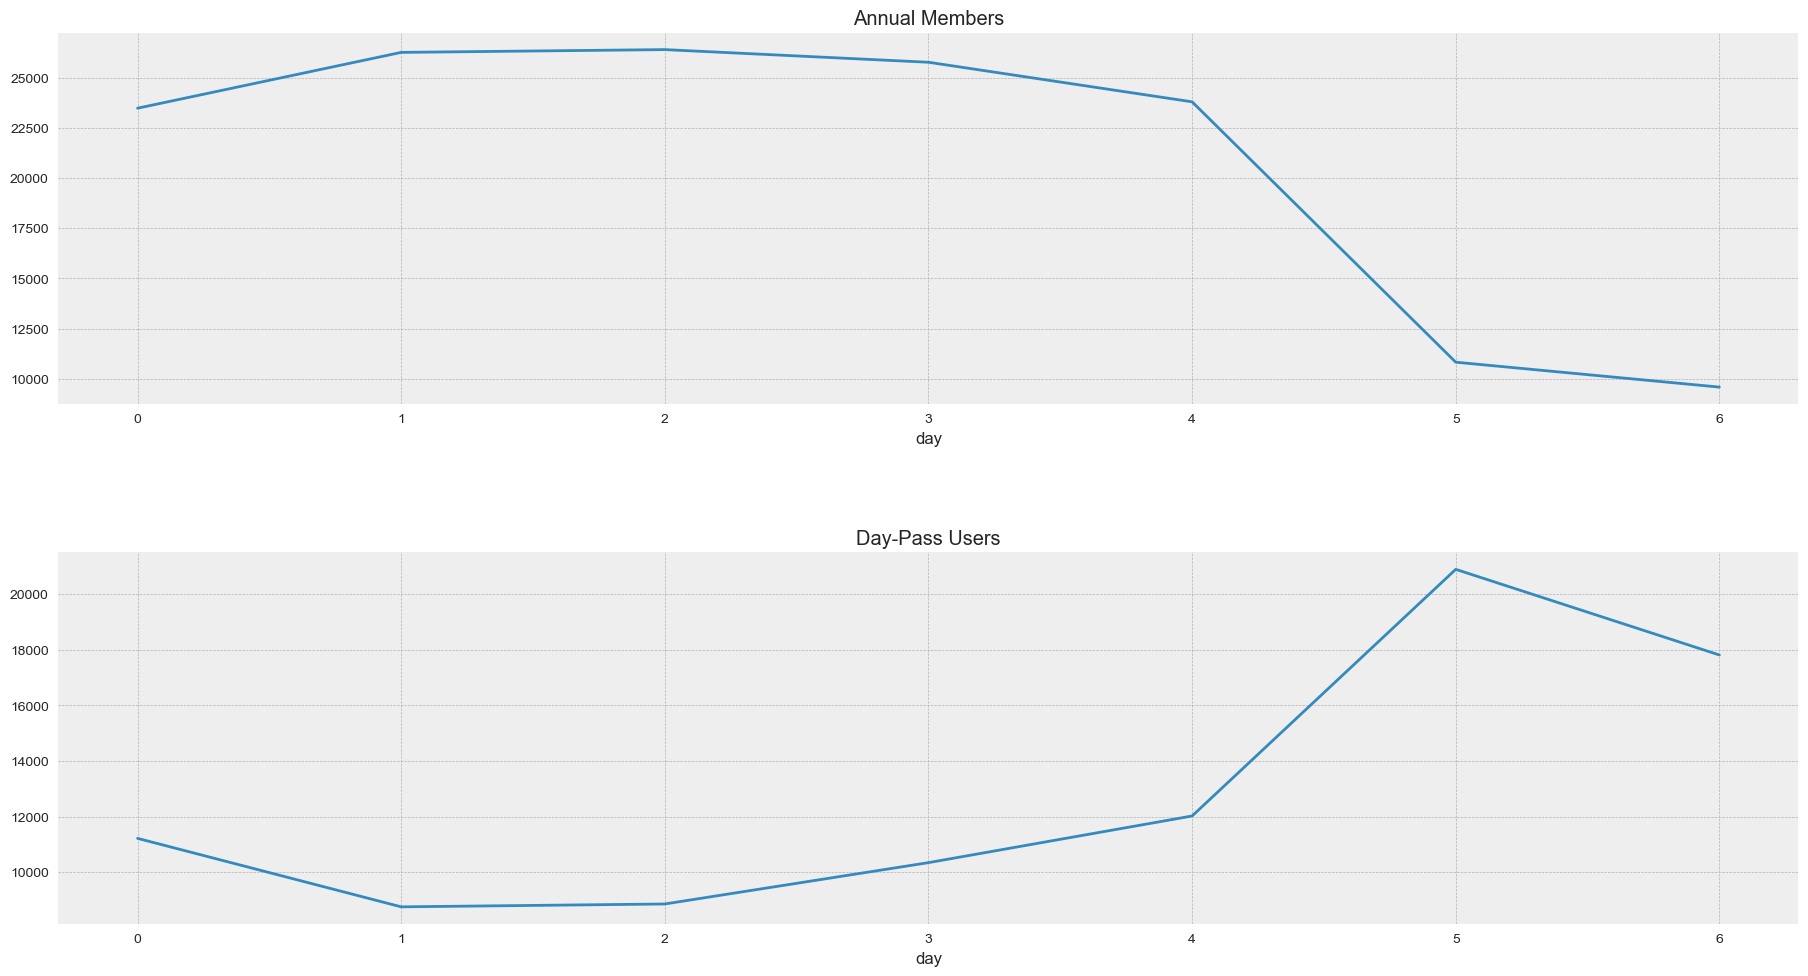

In [84]:
fig, ax = plt.subplots(2, figsize=(20, 11))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Annual Members', grid=True);
by_date.iloc[:, 1].plot(ax=ax[1], title='Day-Pass Users', grid=True); # in one plot - different color

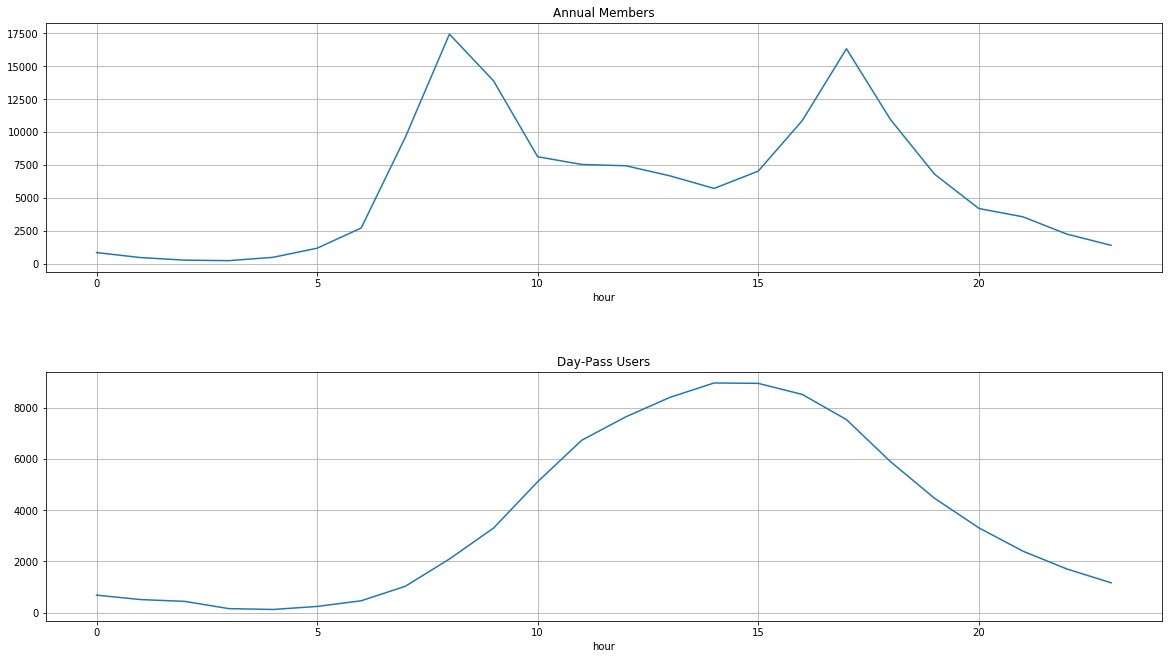

In [100]:
by_date2 = finale.pivot_table('trip_id', aggfunc='count',
                              index='hour',
                              columns='usertype')

fig, ax = plt.subplots(2, figsize=(20, 11))
fig.subplots_adjust(hspace=0.4)
by_date2.iloc[:, 0].plot(ax=ax[0], title='Annual Members', grid=True);
by_date2.iloc[:, 1].plot(ax=ax[1], title='Day-Pass Users', grid=True); # in one plot - different color

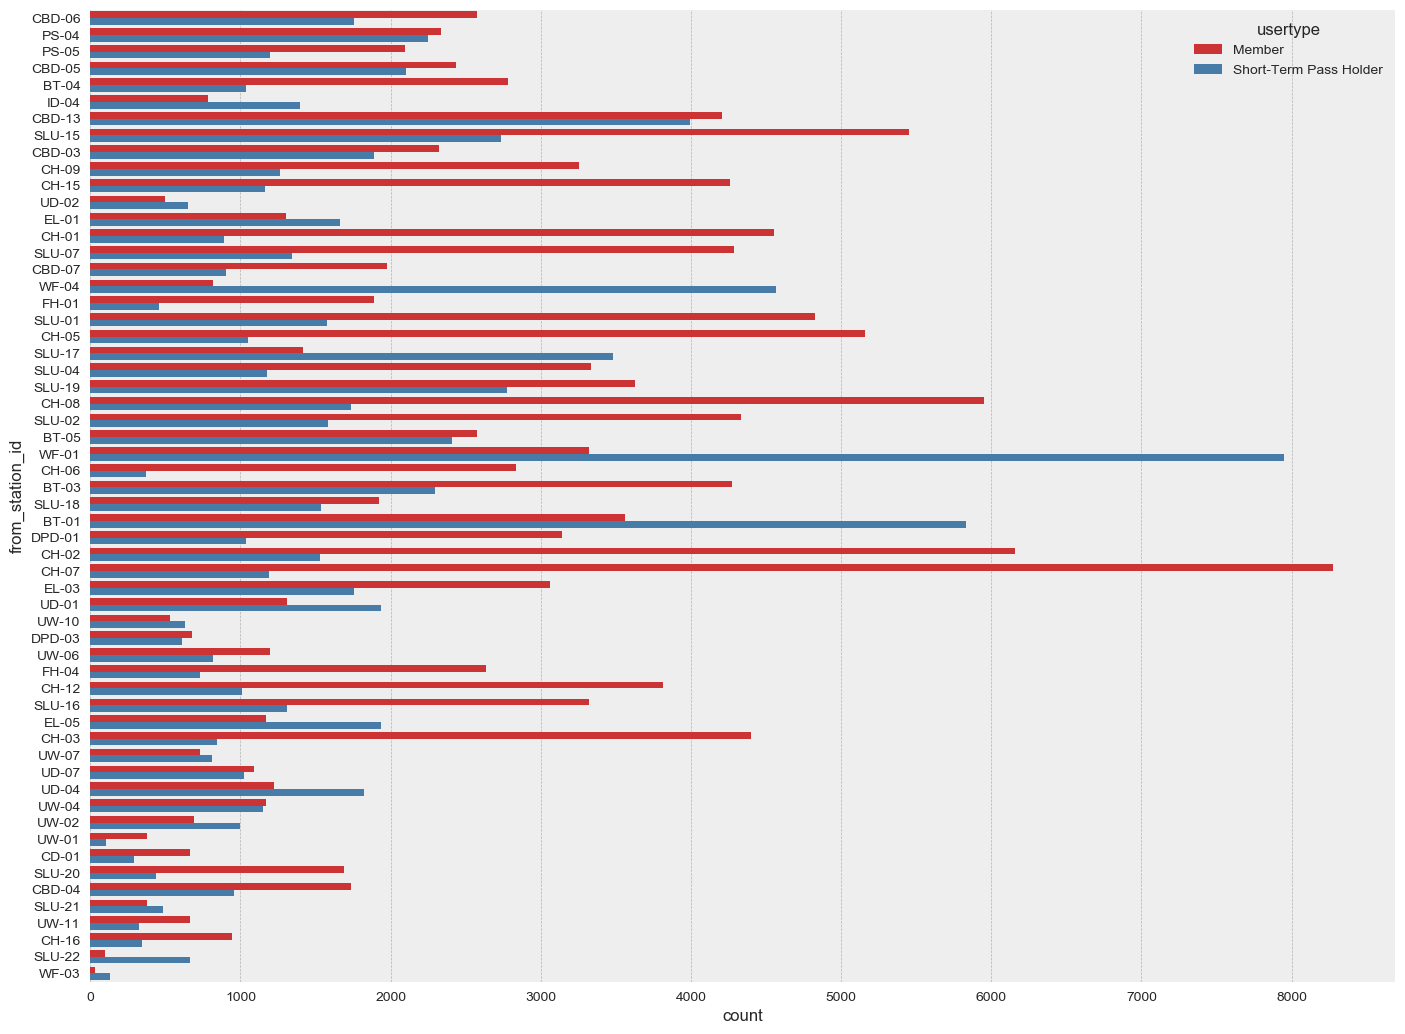

In [85]:
plt.style.use('bmh')
plt.figure(figsize = (15,12))
sb.countplot(y=finale['from_station_id'], hue=finale['usertype'], palette = 'Set1')

Commuters from CH-07 (EPine street) CH-02 + CBD-13, Tourists from WF-01 (Ferry to Victoria) + BT-01 (Space needle)

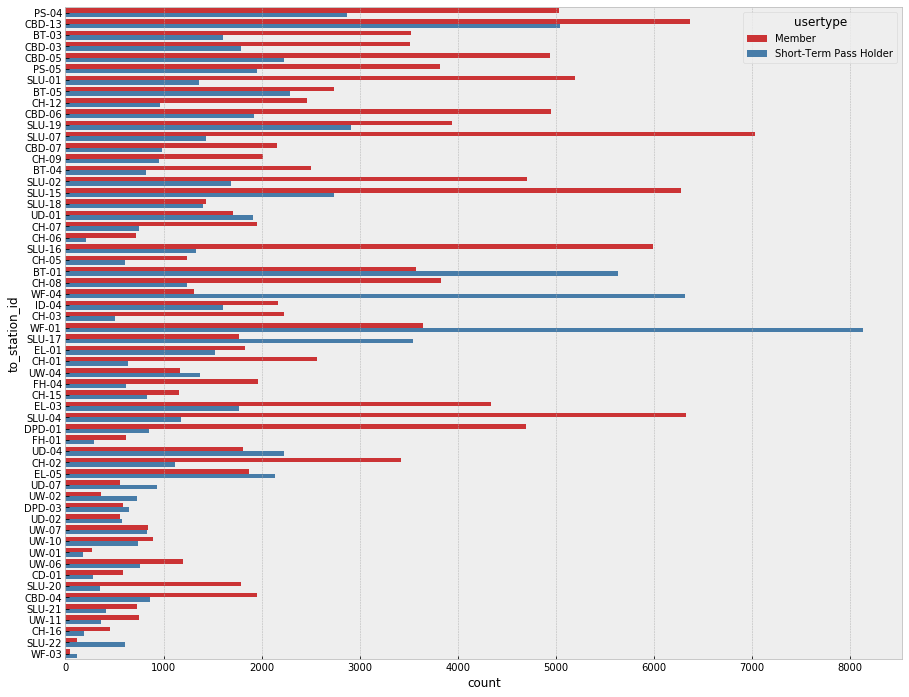

In [42]:
plt.style.use('bmh')
plt.figure(figsize = (15,12))
sb.countplot(y=finale['to_station_id'], hue=finale['usertype'], palette = 'Set1')

# EDA on Stations

In [37]:
#1 tourists coming from victoria by ferry?
#2 commuters using bike lane in E Pine Street?
finale.from_station_name.value_counts().head(10)

Pier 69 / Alaskan Way & Clay St           11274
E Pine St & 16th Ave                       9465
3rd Ave & Broad St                         9392
2nd Ave & Pine St                          8198
Westlake Ave & 6th Ave                     8188
Cal Anderson Park / 11th Ave & Pine St     7690
E Harrison St & Broadway Ave E             7685
2nd Ave & Vine St                          6568
Key Arena / 1st Ave N & Harrison St        6402
REI / Yale Ave N & John St                 6401
Name: from_station_name, dtype: int64

In [38]:
finale.to_station_name.value_counts().head(10)

Pier 69 / Alaskan Way & Clay St                         11768
2nd Ave & Pine St                                       11408
3rd Ave & Broad St                                       9202
Westlake Ave & 6th Ave                                   9009
PATH / 9th Ave & Westlake Ave                            8469
Occidental Park / Occidental Ave S & S Washington St     7898
Seattle Aquarium / Alaskan Way S & Elliott Bay Trail     7621
Republican St & Westlake Ave N                           7504
Pine St & 9th Ave                                        7318
1st Ave & Marion St                                      7171
Name: to_station_name, dtype: int64

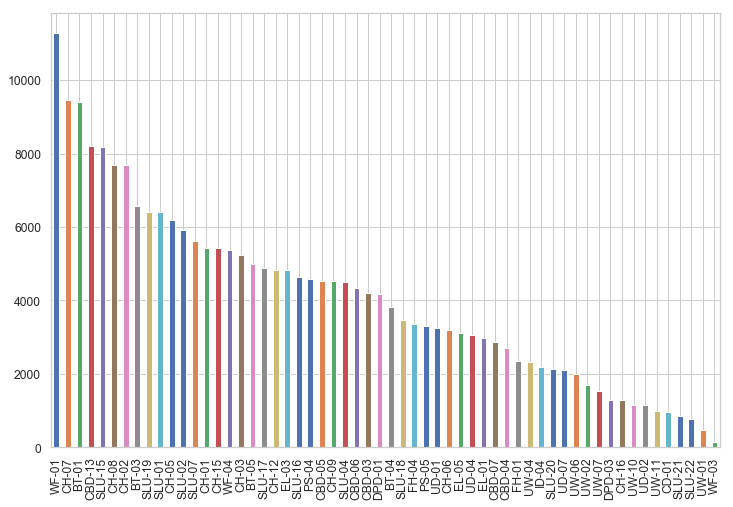

In [45]:
plt.figure(figsize=(12,8))
finale.from_station_id.value_counts().plot(kind='bar');

In [ ]:
plt.figure(figsize = (20,20))
to_graph = trips.from_station_id.value_counts()
to_graph.plot(kind='barh') 
plt.title('Frequency', fontsize=16) 
plt.xlabel('Count') 
plt.ylabel('From Station')

In [ ]:
plt.figure(figsize = (20,20))
to_graph = trips.to_station_id.value_counts()
to_graph.plot(kind='barh') 
plt.title('Frequency', fontsize=16) #add a title 
plt.xlabel('Count') 
plt.ylabel('To Station')

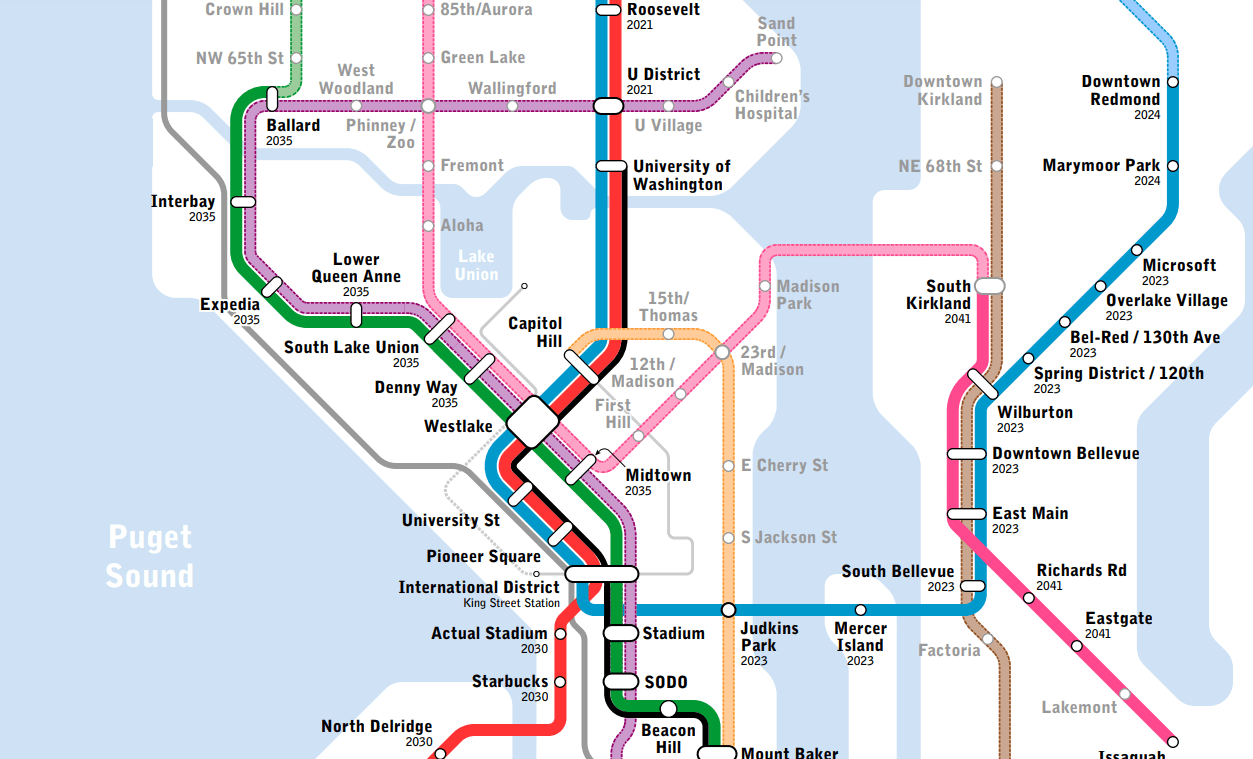

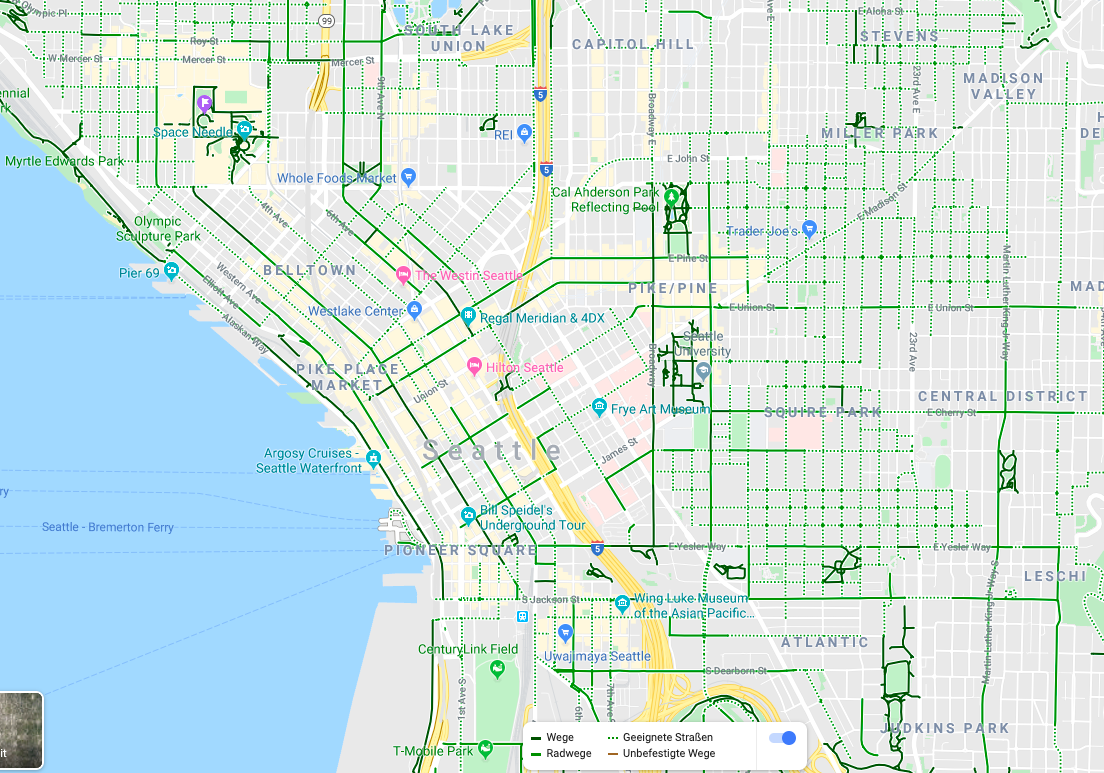

# Map of most used stations

**Daypass User/Tourists**

In [69]:
import folium
folium_map = folium.Map(location=[47.608, -122.335], zoom_start=13,
                        tiles="CartoDB dark_matter") #stamen terrain

# daypass most used departure station
folium.CircleMarker(location=[47.614315, -122.354093], color='#0A8A9F', radius=20).add_to(folium_map)
folium.CircleMarker(location=[47.618418, -122.350964], color='#0A8A9F', radius=10).add_to(folium_map)
folium.CircleMarker(location=[47.607702, -122.341650], color='#0A8A9F', radius=5).add_to(folium_map)

# daypass most used arrival station
folium.CircleMarker(location=[47.614315, -122.354093], color='#E37222', fill=True, radius=15).add_to(folium_map)
folium.CircleMarker(location=[47.607702, -122.341650], color='#E37222', fill=True, radius=10).add_to(folium_map)
folium.CircleMarker(location=[47.618418, -122.350964], color='#E37222', fill=True, radius=5).add_to(folium_map)


In [72]:
folium.PolyLine(locations = [(47.614315, -122.354093), (47.618418, -122.350964)], 
                line_opacity = 0.1).add_to(folium_map) 
folium.PolyLine(locations = [(47.614315, -122.354093), (47.607702, -122.341650)], 
                line_opacity = 0.1).add_to(folium_map) 
folium.PolyLine(locations = [(47.618418, -122.350964), (47.607702, -122.341650)], 
                line_opacity = 0.1).add_to(folium_map)

In [73]:
folium_map

**Members**

In [87]:
import folium
folium_map = folium.Map(location=[47.608, -122.335], zoom_start=13,
                        tiles="CartoDB dark_matter") #stamen terrain
#members most used departure station
folium.CircleMarker(location=[47.615330, -122.311752], color='#0A8A9F', radius=20).add_to(folium_map)
folium.CircleMarker(location=[47.622063, -122.321251], color='#0A8A9F', radius=10).add_to(folium_map)
folium.CircleMarker(location=[47.610185, -122.339641], color='#0A8A9F', radius=5).add_to(folium_map)

#members most used arrival station
folium.CircleMarker(location=[47.618320, -122.338913], color='#E37222', fill=True, radius=20).add_to(folium_map)
folium.CircleMarker(location=[47.610185, -122.339641], color='#E37222', fill=True, radius=10).add_to(folium_map)
folium.CircleMarker(location=[47.623165, -122.338203], color='#E37222', fill=True, radius=5).add_to(folium_map)



In [88]:
folium_map

# Map of Net Departure

**First Version**

In [40]:
import folium
folium_map = folium.Map(location=[47.608, -122.335], zoom_start=13,
                        tiles="CartoDB dark_matter")

In [41]:
# select the first occurrence of each station id
locations = finale.groupby("from_station_id").first()
# and select only the tree columns we are interested in
locations = locations.loc[:, ["from_lat",
                              "from_long",
                              "from_station_name"]]

In [42]:
subset = finale[finale["hour"]==17]
departure_counts =  subset.groupby("from_station_id").count()
# select one column
departure_counts = departure_counts.iloc[:,[0]]
# and rename that column
departure_counts.columns= ["Departure Count"]

In [43]:
subset1 = finale[finale["hour"]==17]
arrival_counts =  subset1.groupby("to_station_id").count()
# select one column
arrival_counts = arrival_counts.iloc[:,[0]]
# and rename that column
arrival_counts.columns= ["Arrival Count"]

In [44]:
trip_counts = departure_counts.join(locations).join(arrival_counts)

In [45]:
# produce table for animated plot
trip_counts.reset_index(level=0, inplace=True)
trip_counts.head()

from_station_id  Departure Count   from_lat   from_long  \
0           BT-01              905  47.618418 -122.350964   
1           BT-03              607  47.615829 -122.348564   
2           BT-04              526  47.616094 -122.341102   
3           BT-05              492  47.613110 -122.344208   
4          CBD-03              527  47.610731 -122.332447   

        from_station_name  Arrival Count  
0      3rd Ave & Broad St            892  
1       2nd Ave & Vine St            521  
2  6th Ave & Blanchard St            353  
3  2nd Ave & Blanchard St            700  
4      7th Ave & Union St            502

In [46]:
trip_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
from_station_id      58 non-null object
Departure Count      58 non-null int64
from_lat             58 non-null float64
from_long            58 non-null float64
from_station_name    58 non-null object
Arrival Count        58 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ KB


In [16]:
trip_counts.to_csv('/Users/jorrikfulda/nf-ds/capstone/trip_counts.csv', index=False)

In [47]:
from decimal import Decimal
for index, row in trip_counts.iterrows():
    net_departures = row["Departure Count"]-row["Arrival Count"]
    radius = np.abs(net_departures)/20
    if net_departures>0:
        color="#E37222" # tangerine
    else:
        color="#0A8A9F" # teal
    
    folium.CircleMarker(location=(row["from_lat"],
                                  row["from_long"]),
                        radius=radius,
                        color=color,
                        fill=True).add_to(folium_map)
folium_map

**Second Version with Usertype**

In [65]:
def get_trip_counts_by_hour(selected_hour):
    # make a DataFrame with locations for each bike station
    locations = finale.groupby("to_station_id").first()
    locations = locations.loc[:, ["to_lat",
                              "to_long",
                              "to_station_name"]]
    
    #select one time of day
    subset = finale[(finale["hour"]==selected_hour)&(finale['usertype']=="Member")]
    
    # count trips for each destination
    departure_counts =  subset.groupby("from_station_id").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["Departure Count"]
    
    # count trips for each origin
    arrival_counts =  subset.groupby("to_station_id").count().iloc[:,[0]]
    arrival_counts.columns= ["Arrival Count"]

    #join departure counts, arrival counts, and locations
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

In [69]:
def plot_station_counts(trip_counts):
    # generate a new map,  width=700, height=850,
    import folium
    folium_map = folium.Map(location=[47.608, -122.335], zoom_start=13,
                        tiles="CartoDB dark_matter", height=1000)

    # for each row in the data, add a cicle marker
    for index, row in trip_counts.iterrows():
        # calculate net departures
        net_departures = row["Departure Count"] - row["Arrival Count"]
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
        popup_text = popup_text.format(row["to_station_name"],
                          row["Arrival Count"],
                          row["Departure Count"],
                          net_departures)
        
        # radius of circles
        _radius = np.abs(net_departures)/15
        if np.isnan(_radius):
            _radius = 0
        
        # choose the color of the marker
        if net_departures>0:
            # color="#FFCE00" # orange
            # color="#007849" # green
            color="#E37222" # tangerine
        else:
            # color="#0375B4" # blue
            # color="#FFCE00" # yellow            
            color="#0A8A9F" # teal
        
        # add marker to the map
        folium.CircleMarker(location=(row["to_lat"],
                                      row["to_long"]),
                            radius=_radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

In [70]:
trip_counts = get_trip_counts_by_hour(17)
plot_station_counts(trip_counts)

In [31]:
folium_map.save("part_1.html")

NameError: name 'folium_map' is not defined

# Map of all Bike Trips taken

In [72]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters

In [73]:
def add_lines(image_array, xys, width=1, weights=None):
    """
    Add a set of lines (xys) to an existing image_array
    width: width of lines
    weights: [], optional list of multipliers for lines. 
    """
    
    for i, xy in enumerate(xys):  # loop over lines
        # create a new gray scale image
        image = Image.new("L",(image_array.shape[1], image_array.shape[0]))
        
        # draw the line
        ImageDraw.Draw(image).line(xy, 200, width=width)
        
        #convert to array
        new_image_array = np.asarray(image, dtype=np.uint8).astype(float)
        
        # apply weights if provided
        if weights is not None:
            new_image_array *= weights[i]
            
        # add to existing array
        image_array += new_image_array

    # convolve image
    new_image_array = scipy.ndimage.filters.convolve(image_array, get_kernel(width*4)) 
    return new_image_array

In [74]:
def get_kernel(kernel_size, blur=1/20, halo=.001):
    """
    Create an (n*2+1)x(n*2+1) numpy array.
    Output can be used as the kernel for convolution.
    """
    
    # generate x and y grids
    x, y = np.mgrid[0:kernel_size*2+1, 0:kernel_size*2+1]
    
    center = kernel_size + 1  # center pixel
    r = np.sqrt((x - center)**2 + (y - center)**2)  # distance from center
    
    # now compute the kernel. This function is a bit arbitrary. 
    # adjust this to get the effect you want.
    kernel = np.exp(-r/kernel_size/blur) + (1 - r/r[center,0]).clip(0)*halo
    return kernel

In [75]:
def to_image(array, hue=.62):
    """converts an array of floats to an array of RGB values using a colormap"""
    
    # apply saturation function
    image_data = np.log(array + 1)
    
    # create colormap, change these values to adjust to look of your plot
    saturation_values = [[0, 0], [1, .68], [.78, .87], [0, 1]]
    colors = [hsv_to_rgb([hue, x, y]) for x, y in saturation_values]
    cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
    
    # apply colormap
    out = cmap(image_data/image_data.max())
    
    # convert to 8-bit unsigned integer
    out = (out*255).astype(np.uint8)
    return out

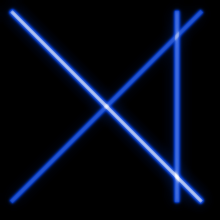

In [76]:
# generate some lines
xys = [(10,10,200,200), (175,10,175,200), (200,10,10,200)]  
weights = np.array([ 2,1,.7])/100  # some weights
# create the image_data
new_image_data = add_lines(np.zeros((220,220)),
                           xys,
                           width=4,
                           weights=weights)
# show the image
Image.fromarray(to_image(new_image_data),mode="RGBA")

In [77]:
min_lat = finale["from_lat"].min()
max_lat = finale["from_lat"].max()
max_lon = finale["from_long"].max()
min_lon = finale["from_long"].min()

def latlon_to_pixel(lat, lon, image_shape):
    # longitude to pixel conversion (fit data to image)
    delta_x = image_shape[1]/(max_lon-min_lon)
    
    # latitude to pixel conversion (maintain aspect ratio)
    delta_y = delta_x/np.cos(lat/360*np.pi*2)
    pixel_y = (max_lat-lat)*delta_y
    pixel_x = (lon-min_lon)*delta_x
    return (pixel_y,pixel_x)

In [78]:
def row_to_pixel(row,image_shape):
    """
    convert a row (1 trip) to pixel coordinates
    of start and end point
    """
    start_y, start_x = latlon_to_pixel(row["from_lat"], 
                                       row["from_long"], image_shape)
    end_y, end_x = latlon_to_pixel(row["to_lat"], 
                                   row["to_long"], image_shape)
    xy = (start_x, start_y, end_x, end_y)
    return xy

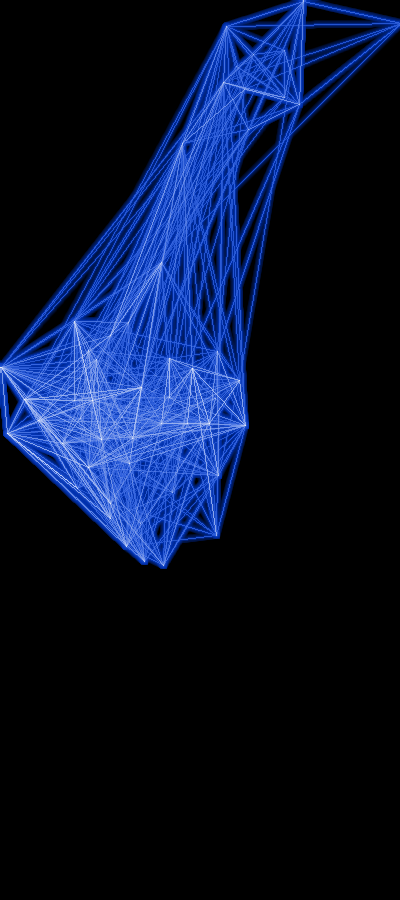

In [85]:
paths = finale[finale.hour==19]
paths = paths.iloc[:3000,:]
# generate empty pixel array, choose your resolution
image_data = np.zeros((900,400))
# generate pixel coordinates of starting points and end points
xys = [row_to_pixel(row, image_data.shape) for i, row in paths.iterrows()]
# draw the lines
image_data = add_lines(image_data, xys, weights=None, width = 1)
Image.fromarray(to_image(image_data*10)[:,:,:3],mode="RGB")

In [86]:
def add_alpha(image_data):
    """
    Uses the Value in HSV as an alpha channel. 
    This creates an image that blends nicely with a black background.
    """
    
    # get hsv image
    hsv = rgb_to_hsv(image_data[:,:,:3].astype(float)/255)
    
    # create new image and set alpha channel
    new_image_data = np.zeros(image_data.shape)
    new_image_data[:,:,3] = hsv[:,:,2]
    
    # set value of hsv image to either 0 or 1.
    hsv[:,:,2] = np.where(hsv[:,:,2]>0, 1, 0)
    
    # combine alpha and new rgb
    new_image_data[:,:,:3] = hsv_to_rgb(hsv)
    return new_image_data

In [87]:
import folium
# create the map
folium_map = folium.Map(location=[47.608, -122.335],
                        zoom_start=13,
                        tiles="CartoDB dark_matter",
                        width='100%', height=1000)

# create the overlay
map_overlay = add_alpha(to_image(image_data*10))

# compute extent of image in lat/lon
aspect_ratio = map_overlay.shape[1]/map_overlay.shape[0]
delta_lat = (max_lon-min_lon)/aspect_ratio*np.cos(min_lat/360*2*np.pi)

# add the image to the map
img = folium.raster_layers.ImageOverlay(map_overlay,
                           bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                           opacity = 1,
                           name = "Paths")

img.add_to(folium_map)
folium.LayerControl().add_to(folium_map)

# show the map
folium_map

In [69]:
finale.head()

trip_id           starttime            stoptime  tripduration  \
0      431 2014-10-13 10:31:00 2014-10-13 10:48:00       985.935   
1      432 2014-10-13 10:32:00 2014-10-13 10:48:00       926.375   
2      433 2014-10-13 10:33:00 2014-10-13 10:48:00       883.831   
3      434 2014-10-13 10:34:00 2014-10-13 10:48:00       865.937   
4      435 2014-10-13 10:34:00 2014-10-13 10:49:00       923.923   

     from_station_name                                    to_station_name  \
0  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
1  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
2  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
3  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
4  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   

  from_station_id to_station_id usertype  gender  birthyear    minutes  \
0          CBD-06         PS-04   Member    Male     1960.0  16.432250   
1          CBD-06         PS-04   Member    Male     1970.0  15.439583   
2          CBD-06         PS-04   Member  Female     1988.0  14.730517   
3          CBD-06         PS-04   Member  Female     1977.0  14.432283   
4          CBD-06         PS-04   Member    Male     1971.0  15.398717   

        date  hour  day  from_lat   from_long  from_dockcount     to_lat  \
0 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
1 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
2 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
3 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   
4 2014-10-13    10    0  47.60595 -122.335768              18  47.600757   

      to_long  to_dockcount  max_temperature_f  mean_temperature_f  \
0 -122.332946            18                 71                62.0   
1 -122.332946            18                 71                62.0   
2 -122.332946            18                 71                62.0   
3 -122.332946            18                 71                62.0   
4 -122.332946            18                 71                62.0   

   min_temperaturef  max_dew_point_f  meandew_point_f  min_dewpoint_f  \
0                54               55               51              46   
1                54               55               51              46   
2                54               55               51              46   
3                54               55               51              46   
4                54               55               51              46   

   max_humidity  mean_humidity  min_humidity  max_sea_level_pressure_in  \
0            87             68            46                      30.03   
1            87             68            46                      30.03   
2            87             68            46                      30.03   
3            87             68            46                      30.03   
4            87             68            46                      30.03   

   mean_sea_level_pressure_in  min_sea_level_pressure_in  \
0                       29.79                      29.65   
1                       29.79                      29.65   
2                       29.79                      29.65   
3                       29.79                      29.65   
4                       29.79                      29.65   

   max_visibility_miles  mean_visibility_miles  min_visibility_miles  \
0                    10                     10                     4   
1                    10                     10                     4   
2                    10                     10                     4   
3                    10                     10                     4   
4                    10                     10                     4   

   max_wind_speed_mph  mean_wind_speed_mph  precipitation_in events  year  \
0                  13                    4     

In [63]:
# make a list of locations (latitude longitude) for each station id
locations = finale.groupby("from_station_id").mean()
locations = locations.loc[:,["from_lat", "from_long"]]

# group by each unique pair of (start-station, end-station) and count the number of trips
finale["path_id"] = [(id1,id2) for id1,id2 in zip(finale["from_station_id"], 
                                                     finale["to_station_id"])]
paths = finale[finale["hour"]==9].groupby("path_id").count().iloc[:,[1]] 
paths.columns = ["Trip Count"]

# select only paths with more than X trips
paths = paths[paths["Trip Count"]>5]
paths["from_station_id"] = paths.index.map(lambda x:x[0])
paths["to_station_id"] = paths.index.map(lambda x:x[1])
paths = paths[paths["from_station_id"]!=paths["to_station_id"]]

# join latitude/longitude into new table
paths = paths.join(locations,on="from_station_id")
locations.columns = ["to_lat","to_long"]
paths = paths.join(locations,on="to_station_id")
paths.index = range(len(paths))

paths.shape

(577, 7)

In [64]:
def get_image_data(paths, min_count=0, max_count=None):
    # generate empty pixel array
    image_data = np.zeros((900*2,400*2))
    
    # generate pixel coordinates of starting points and end points
    if max_count is None:
        max_count = paths["Trip Count"].max()+1
    selector = (paths["Trip Count"]>= min_count) & (paths["Trip Count"]< max_count)
    xys = [row_to_pixel(row, image_data.shape) for i, row in paths[selector].iterrows()]

    # draw the lines
    image_data = add_lines(image_data, xys, weights=paths["Trip Count"], width = 1)
    return image_data

In [66]:
folium_map = folium.Map(location=[47.608, -122.335],
                        zoom_start=13,
                        tiles="CartoDB dark_matter",
                        width='100%', height=1000)

thresholds = [5,15,25]

for i,t in enumerate(thresholds):
    upper = thresholds[i+1] if i<len(thresholds)-1 else None
    image_data = get_image_data(paths, t, upper)
    name = "{} < Num. Trips < {}".format(t,"max" if upper is None else upper)

    map_overlay = add_alpha(to_image(image_data*10))
    delta_lat = (max_lon-min_lon)/map_overlay.shape[1]*map_overlay.shape[0]*np.cos(min_lat/360*2*np.pi)
    img = folium.raster_layers.ImageOverlay(map_overlay,
                               bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                               name = name)

    img.add_to(folium_map)

lc = folium.LayerControl().add_to(folium_map)

folium_map

# Try to use Datashader
**Makes no sense**

In [89]:
import datashader as ds
import pandas as pd
from colorcet import fire
from datashader import transfer_functions as tf

df = pd.read_csv('finale1.csv', usecols=['from_lat', 'from_long'])
df.head()

from_lat   from_long
0  47.60595 -122.335768
1  47.60595 -122.335768
2  47.60595 -122.335768
3  47.60595 -122.335768
4  47.60595 -122.335768

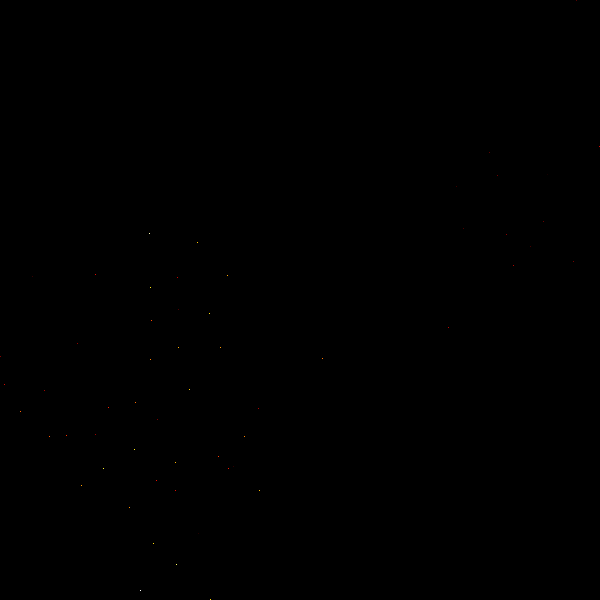

In [90]:
agg = ds.Canvas().points(df, 'from_lat', 'from_long')
tf.set_background(tf.shade(agg, cmap=fire),"black")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
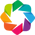

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [from_lat,from_long]   (R,G,B,A)

In [91]:
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

map_tiles  = EsriImagery().opts(alpha=0.5, width=900, height=480, bgcolor='black')
points     = hv.Points(df, ['from_lat', 'from_long'])
taxi_trips = datashade(points, x_sampling=1, y_sampling=1, cmap=fire, width=900, height=480)

map_tiles * taxi_trips

# Unfinished Try to make animated Gif of Net Departure

In [92]:
import consolidated_functions as cf
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap, rgb_to_hsv, hsv_to_rgb
import scipy.ndimage.filters
import time
import datetime
import os.path
import io
import os

In [93]:
finale["hour"] = finale["starttime"].map(lambda x: x.hour)

In [94]:
def interpolate(df1, df2, x):
    """return a weighted average of two dataframes"""
    df = df1 * (1 - x) + df2 * x
    return df.replace(np.nan, 0)
  

def get_trip_counts_by_minute(float_hour, data):
    """get an interpolated dataframe for any time, based
    on hourly data"""
    
    columns = ["from_lat",
               "from_long",
               "Departure Count",
               "Arrival Count"]
    df1 = get_trip_counts_by_hour(int(float_hour), data)
    df2 = get_trip_counts_by_hour(int(float_hour) + 1, data)
    
    df = interpolate(df1.loc[:,columns], 
                     df2.loc[:,columns], 
                     float_hour % 1)
    
    df["from_station_name"] = df1["from_station_name"]
    return df

In [98]:
cf.plot_station_counts(get_trip_counts_by_minute(9.5, finale), zoom_start=14)

TypeError: get_trip_counts_by_hour() takes 1 positional argument but 2 were given

In [113]:
def go_arrivals_frame(i, hour_of_day, save_path):
    
    # create the map object
    data = get_trip_counts_by_minute(hour_of_day, finale)
    my_frame = plot_station_counts(data, zoom_start = 14)
    
    # generate the png file as a byte array
    png = my_frame._to_png()
    
    #  now add a caption to the image to indicate the time-of-day.
    hour = int(hour_of_day)
    minutes = int((hour_of_day % 1) * 60)
    
    # create a PIL image object
    image = Image.open(io.BytesIO(png))
    draw = ImageDraw.ImageDraw(image)
    
    # load a font
    font = ImageFont.truetype("Roboto-Light.ttf", 30)
    
    # draw time of day text
    draw.text((20,image.height - 50), 
              "time: {:0>2}:{:0>2}h".format(hour, minutes),
              fill=(255, 255, 255), 
              font=font)
    
    # draw title
    draw.text((image.width - 400,20), 
              "Net Arrivals vs Time of Day",
              fill=(255, 255, 255), 
              font=font)
    
    # write to a png file
    filename = os.path.join(save_path, "frame_{:0>5}.png".format(i))
    image.save(filename, "PNG")
    return image

In [114]:
dir_name = 'frames'
if not os.path.exists(dir_name):
    os.mkdir(dir_name)
go_arrivals_frame(1, 8.5, dir_name)

TypeError: get_trip_counts_by_hour() takes 1 positional argument but 2 were given